In [603]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
import ast
import math

In [80]:
## Base Data
df_population = pd.read_csv('Population Data.csv')
df_temperature = pd.read_csv('Temperature Data.csv')

In [52]:
# My timeseries
df = pd.read_csv('temperature_of_location_date.csv')

In [53]:
df['datetime'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))


In [54]:
df['datetime'].iloc[-1]

Timestamp('2021-04-20 00:00:00')

In [55]:
df['daily_temps'] = df['daily_temps'].apply(ast.literal_eval)

In [9]:
df.head(3)

,Unnamed: 0,date,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York",...,"Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps,datetime
0,0,1/1/2015,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...",...,"(7.267839188054266, 1.2597305417711855, 13.306...","(7.201354121181819, 1.154658288185659, 13.2794...","(7.243316298738816, 1.2219635019938928, 13.294...","(7.258345407380921, 1.246744173453674, 13.2989...","(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.143194204652545, -2.0310582522610594, 6.328...",2015-01-01
1,1,1/2/2015,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.610522538889761, -6.293151018732043, 4.471...","(-1.5874865803073686, -4.999969140526002, 4.40...",...,"(11.964299921129687, 8.54262383433644, 15.0643...","(11.84453325605251, 8.456272588337987, 14.9129...","(11.926497144776375, 8.513341986493058, 15.018...","(11.960202600064934, 8.53553492156532, 15.0627...","(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.36100033710542, 0.7371562847348073, 8.15968...",2015-01-02
2,2,1/3/2015,"(5.313746601456074, 0.0537208688345699, 11.180...","(-1.5042004354211354, -4.641065832081684, 3.01...","(1.9401067861655703, -0.10967571559474101, 5.0...","(1.9366071662619098, -0.09493625703022997, 5.0...","(1.9531350402008638, -0.18257317909691917, 5.0...","(1.9230983187361388, -0.031069294684709044, 5....","(-1.5629823097813509, -8.72259919416442, 5.303...","(-0.6332781996894676, -5.599949953882896, 8.30...",...,"(13.89843974963735, 11.627892569102759, 17.399...","(13.77680428203832, 11.520199220572355, 17.277...","(13.857516482265103, 11.592308604298138, 17.35...","(13.889114398533502, 11.620959646627288, 17.38...","(13.808623920967795, 11.549958815046766, 17.30...","(13.772007402977584, 11.517701465200151, 17.26...","(13.73905655470369, 11.488634166796471, 17.230...","(13.589111450096825, 11.35548016535289, 17.081...","(5.463414875888266, 1.5140982044930749, 9.7487...",2015-01-03


<IPython.core.display.Javascript object>


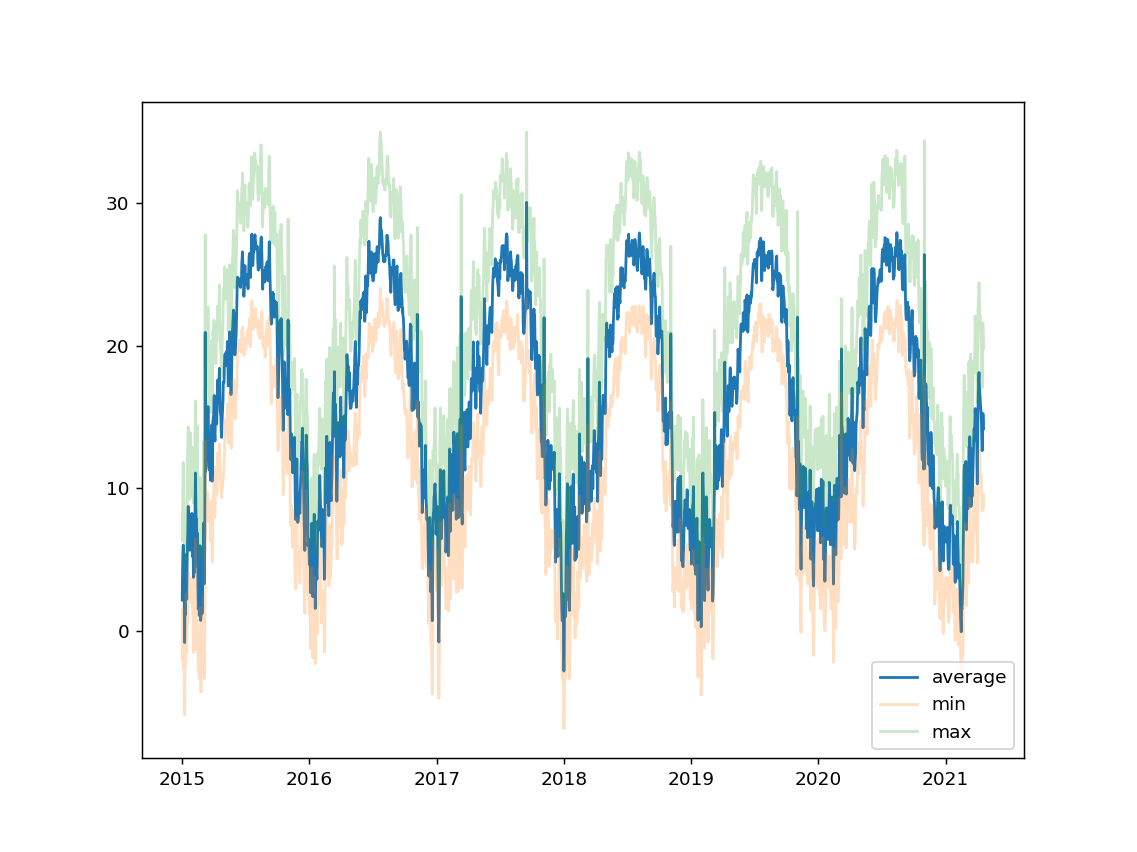

In [198]:
# 2a) Seasonal-temperature
fig, ax = plt.subplots()
ax.plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
ax.plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
ax.plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
ax.legend()

In [57]:
#Monthly averages
df['month'] = df.datetime.apply(lambda x: x.month)

In [78]:
df.head(2)

,Unnamed: 0,date,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York",...,"Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps,datetime,month,temp_mean,temp_min,temp_max
0,0,1/1/2015,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...",...,"(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.143194204652545, -2.0310582522610594, 6.328...",2015-01-01,1,2.143194,-2.031058,6.328439
1,1,1/2/2015,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.610522538889761, -6.293151018732043, 4.471...","(-1.5874865803073686, -4.999969140526002, 4.40...",...,"(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.36100033710542, 0.7371562847348073, 8.15968...",2015-01-02,1,4.361000,0.737156,8.159681


In [66]:
df['temp_mean'] = df['daily_temps'].apply(lambda x: x[0])
df['temp_min'] = df['daily_temps'].apply(lambda x: x[1])
df['temp_max'] = df['daily_temps'].apply(lambda x: x[2])


In [69]:
df_monthly = df.groupby('month').mean()

Text(0, 0.5, 'Temperature')

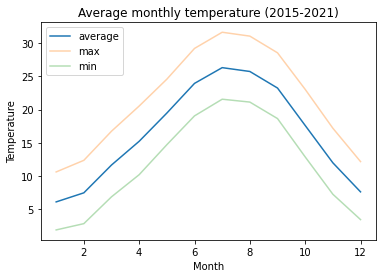

In [77]:
# 2b) Monthly
fig, ax = plt.subplots()
ax.plot(df_monthly.index.values, df_monthly.temp_mean.values, label='average')
ax.plot(df_monthly.index.values, df_monthly.temp_max.values, alpha=0.35, label='max')
ax.plot(df_monthly.index.values, df_monthly.temp_min.values, alpha=0.35, label='min')
ax.legend()
ax.set_title("Average monthly temperature (2015-2021)")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

In [ ]:
# 2c) Missing data
fig, ax = plt.subplots()
# Number of stations... 

#num_distinct = df_population

In [210]:
def count_missing_stations(df_temperature):
    """Count stations that have no latitude/longitude. """
    lats = [df_temperature[df_temperature['name'] == uname].Lat.iloc[0] for uname in df_temperature.name.unique()]
    return np.count_nonzero(np.isnan(lats))

def get_stations(df_temperature):
    """Return stations that have a latitude/longitude. """
    lats = [(uname, df_temperature[df_temperature['name'] == uname].Lat.iloc[0]) for uname in df_temperature.name.unique()]
    return dict(lats)

def available_stations(df_temperature):
    return [k for k,v in get_stations(df_temperature).items() if not np.isnan(v)]

In [144]:
# Get number of stations, missing
stations = df_temperature.name.unique()
num_stations = len(stations)
num_located_stations = num_stations - count_missing_stations(df_temperature)
missing_stations = [k for k,v in get_stations(df_temperature).items() if np.isnan(v)]
available_stations =  [k for k,v in get_stations(df_temperature).items() if not np.isnan(v)]
num_missing = len(missing_stations)
print(num_stations, num_located_stations, num_missing)

38 33 5


In [145]:
# By date:
date = "4/19/2021"
df_date = df_temperature[df_temperature.location_date == date]

In [187]:
datetimes = [datetime.datetime.strptime(dt, "%m/%d/%Y") for dt in df_temperature.location_date.unique()]

In [197]:
#datetimes

In [183]:
type(datetimes[0])

str

In [532]:
# For each day, get the number of available stations
def get_num_stations_by_day(df_temperature):
    avail_stations = []
    dates = df_temperature.location_date.unique()
    for date_i in dates:
        df_date = df_temperature[df_temperature.location_date == date_i]
        avail_stations.append(len(available_stations(df_date)))
    return avail_stations

In [164]:
## Some dates have missing stations...

(array([ 1, 28, 30, 31, 32, 33]), array([  14,    2,    2,    2,    3, 2279]))

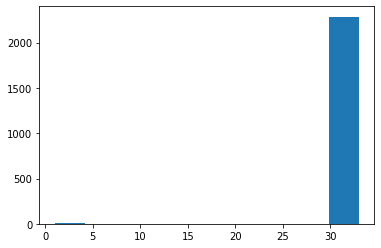

In [163]:
fig, ax = plt.subplots()

ax.hist(avail_stations)
np.unique(avail_stations, return_counts=True)

In [176]:
%matplotlib notebook

There are rare days < 1% where the station coverage drops to 1. For these, let's use temporal interpolation
to find the temperature on that day.

In [194]:
datetimes[0].date()

datetime.date(2021, 4, 20)

In [ ]:
# 15 days is shortest time between two big station dips.
# So, on days where the num_avail < (1/2)(num_stations), interpolate using

<IPython.core.display.Javascript object>


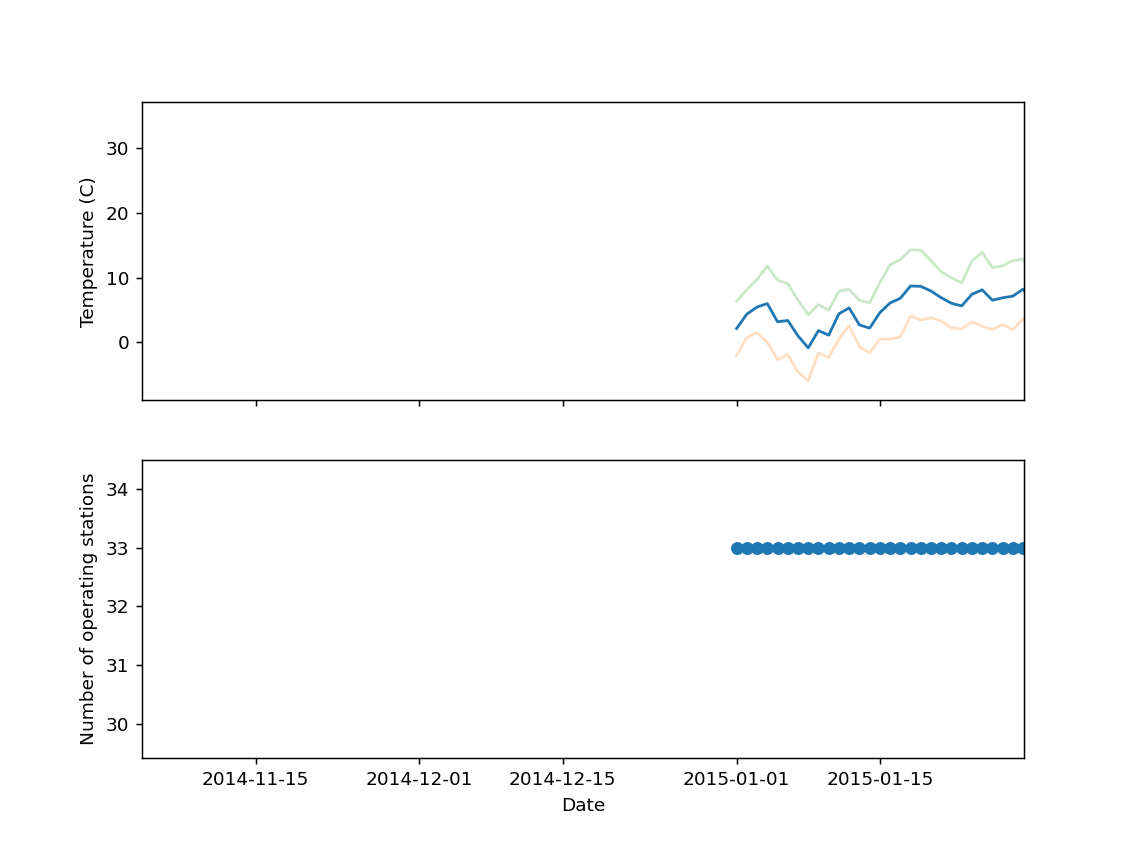

Text(0, 0.5, 'Number of operating stations')

In [202]:
# 2a) Seasonal-temperature
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
ax[0].plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
ax[0].plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
ax[0].set_ylabel("Temperature (C)")

#ax.legend()
ax[1].scatter([dt.date() for dt in datetimes], avail_stations) 
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of operating stations")


You can see that while the large majority of days all stations are up, there are 14 days where only 1/30 is up. For those days, we're getting massive jumps in the US average (+10 degrees).

We're better off just interpolating the value from the surrounding points. (Linear interpolation)

In [ ]:
# Really, I should've started by doing linear interpolation on the signals...

In [219]:
len(available_stations(df_temperature[df_temperature.location_date == '9/14/2017']))

df['operating_stations'] = df['date'].apply(lambda x: available_stations(df_temperature[df_temperature.location_date==x]))

In [ ]:
df_temperature['datetime'] = df['date'].apply(lambda x: )

In [252]:
df_temperature['datetime'] = df_temperature['location_date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))


In [253]:
# All dates:
dates_ = df_temperature.datetime.unique()

In [273]:
print(len(dates_))
dates_

2302


array(['2021-04-20T00:00:00.000000000', '2021-04-19T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', ...,
       '2015-01-03T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [491]:
# Station data
station_name = 'Atlanta'
df_station = df_temperature[df_temperature['name'] == station_name]

station_dates = df_station.datetime.unique()



In [262]:
print(dates_[0], station_dates[0])

2021-04-20T00:00:00.000000000 2021-04-20T00:00:00.000000000


In [257]:
station_dates

array(['2021-04-20T00:00:00.000000000', '2021-04-19T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', ...,
       '2015-01-03T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [280]:
def missing_datetimes_of_station(station_name, df_temperature):
    ref_dates = df_temperature.datetime.unique()
    df_station = df_temperature[df_temperature['name'] == station_name]

    station_dates = df_station.datetime.unique()
    missing_dts = []
    for d in ref_dates:
        if d not in station_dates:
            missing_dts.append(d)
            
    return missing_dts

In [404]:
missing_dts = missing_datetimes_of_station('Atlanta', df_temperature)

In [295]:
station_name = 'Raleigh/Durham'
missing_dts = missing_datetimes_of_station(station_name, df_temperature)
missing_dts

[numpy.datetime64('2021-03-14T00:00:00.000000000'),
 numpy.datetime64('2020-11-01T00:00:00.000000000'),
 numpy.datetime64('2020-03-08T00:00:00.000000000'),
 numpy.datetime64('2019-11-03T00:00:00.000000000'),
 numpy.datetime64('2019-03-10T00:00:00.000000000'),
 numpy.datetime64('2018-11-04T00:00:00.000000000'),
 numpy.datetime64('2018-03-11T00:00:00.000000000'),
 numpy.datetime64('2017-11-05T00:00:00.000000000'),
 numpy.datetime64('2017-09-16T00:00:00.000000000'),
 numpy.datetime64('2017-03-12T00:00:00.000000000'),
 numpy.datetime64('2016-11-06T00:00:00.000000000'),
 numpy.datetime64('2016-03-13T00:00:00.000000000'),
 numpy.datetime64('2015-11-01T00:00:00.000000000'),
 numpy.datetime64('2015-03-08T00:00:00.000000000')]

In [435]:
# make new rows with same details, but datetime, nan floats 
print(missing_dts[0])
matching_row = df_temperature[df_temperature.name==station_name].iloc[0]

2021-03-14T00:00:00.000000000


In [500]:
def interpolate_temperature(dt, df_station, field='temp_mean_c'):
    # From the new datetime, get the temperature from previous and following day.
    #print(df_station)
    #print(dt)
    dt = pd.to_datetime(dt).to_pydatetime()
    next_day = dt + datetime.timedelta(days=1)
    prev_day = dt - datetime.timedelta(days=1)
    #return next_day, prev_day, dt
    #print(next_day, prev_day, dt)
    prev_temps = df_station[df_station.datetime == prev_day][field].values
    next_temps = df_station[df_station.datetime == next_day][field].values
    
    # Handle the case where one is missing
    prev_temp = prev_temps[0] if prev_temps.size > 0 else float("nan")
    next_temp = next_temps[0] if next_temps.size > 0 else float("nan")


    return np.nanmean([prev_temp, next_temp])

In [486]:
np.nanmean([18, float("nan")])

18.0

In [492]:
interpolate_temperature(missing_dts[0], df_station, field='temp_mean_c')

18.8229167

In [490]:
df_station[df_station.datetime == pd.to_datetime(missing_dts[11]).to_pydatetime() - datetime.timedelta(days=1)]['temp_mean_c'].values[0]

19.8791667

In [395]:
df_station[df_station.datetime == interpolate_temperature(missing_dts[0], df_station) + datetime.timedelta(days=1)]

2021-03-14T00:00:00.000000000


,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
1403,1403,Atlanta,UnitedStates,USA,North America,KATL,3/15/2021,18.266667,15.6,20.6,Atlanta,Georgia,2021-03-15,"(-84.4227, 33.7629)",33.7629,-84.4227


In [449]:
def create_new_date_row(row, dt, df_station):
    """Use an old row and new datetime to create a new row, to be interpolated on."""
    new_row = row.copy()
    # Change fields... (temp_mean_c, temp_min_c, temp_max_c, datetime, date)
    #print(new_row)
    
    #print(dt)
    # Replace dates...
    new_row['datetime'] = dt
    new_row['location_date'] = pd.to_datetime(dt).to_pydatetime().strftime("%-m/%-d/%Y")
    # Make temps nan
    new_row['temp_mean_c'] = interpolate_temperature(dt, df_station, field='temp_mean_c')
    new_row['temp_min_c'] = interpolate_temperature(dt, df_station, field='temp_min_c')
    new_row['temp_max_c'] = interpolate_temperature(dt, df_station, field='temp_max_c')

    #print(new_row)
    return new_row

In [495]:
matching_row

Unnamed: 0                        31
name                  Raleigh/Durham
country_name            UnitedStates
country_code                     USA
continent              North America
station_code                    KRDU
location_date              4/20/2021
temp_mean_c                  15.7792
temp_min_c                       6.7
temp_max_c                      23.9
City                         Raleigh
State                 North Carolina
datetime         2021-04-20 00:00:00
LonLat           (-78.6414, 35.8302)
Lat                          35.8302
Lon                         -78.6414
Name: 31, dtype: object

In [496]:
# Create all missing rows
def build_interpolated_df(station_name, df_temperature):
# Station data
    df_station = df_temperature[df_temperature['name'] == station_name]

    station_dates = df_station.datetime.unique()
    missing_dts = missing_datetimes_of_station(station_name, df_temperature)

    # This row is just for a template
    matching_row = df_temperature[df_temperature.name==station_name].iloc[0]

    rows = []

    for missing_dt in missing_dts:
        rows.append(create_new_date_row(matching_row, missing_dt, df_station))
    return pd.DataFrame(rows)

In [499]:
np.nanmean([float("nan")])

<ipython-input-499-377c49eef266>:1: RuntimeWarning: Mean of empty slice
  np.nanmean([float("nan")])


nan

In [510]:
dfs_interp = []
for station_u in df_temperature.name.unique():
    dfs_interp.append(build_interpolated_df(station_u, df_temperature))

In [514]:
# Contains the interpolations for all missing day-stations
df_interp_full = pd.concat(dfs_interp, ignore_index=True)

In [515]:
len(df_interp_full)

544

In [520]:
# Now add these interpolations to the original set
df_full = pd.concat([df_interp_full, df_temperature], ignore_index=True)

In [524]:
df_full.sort_values(by=['datetime'])

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
89762,89218,Phoenix/Sky HRBR,UnitedStates,USA,North America,KPHX,1/1/2015,4.354167,1.7,7.2,Phoenix,Arizona,2015-01-01,"(-112.088, 33.5722)",33.5722,-112.0880
89728,89184,Boise,UnitedStates,USA,North America,KBOI,1/1/2015,-11.070833,-13.9,-8.0,Boise,Idaho,2015-01-01,"(-116.2311, 43.5985)",43.5985,-116.2311
89729,89185,Boston,UnitedStates,USA,North America,KBOS,1/1/2015,-2.329167,-5.6,0.6,Boston,Massachusetts,2015-01-01,"(-71.0202, 42.332)",42.3320,-71.0202
89746,89202,Little Rock,UnitedStates,USA,North America,KLIT,1/1/2015,2.362500,1.7,3.9,Little Rock,Arkansas,2015-01-01,"(-92.3586, 34.7254)",34.7254,-92.3586
89745,89201,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,1/1/2015,0.691667,-2.2,3.3,New York,New York,2015-01-01,"(-73.9385, 40.6643)",40.6643,-73.9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22,Memphis,UnitedStates,USA,North America,KMEM,4/20/2021,14.225000,4.4,23.3,Memphis,Tennessee,2021-04-20,"(-89.9785, 35.1035)",35.1035,-89.9785
565,21,Little Rock,UnitedStates,USA,North America,KLIT,4/20/2021,13.225000,5.6,23.3,Little Rock,Arkansas,2021-04-20,"(-92.3586, 34.7254)",34.7254,-92.3586
564,20,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,4/20/2021,16.891667,11.7,23.3,New York,New York,2021-04-20,"(-73.9385, 40.6643)",40.6643,-73.9385
562,18,Houston,UnitedStates,USA,North America,KIAH,4/20/2021,19.787500,11.7,27.2,Houston,Texas,2021-04-20,"(-95.3863, 29.7805)",29.7805,-95.3863


In [534]:
avails_std = get_num_stations_by_day(df_temperature)

In [535]:
avails_interp = get_num_stations_by_day(df_full)

<IPython.core.display.Javascript object>


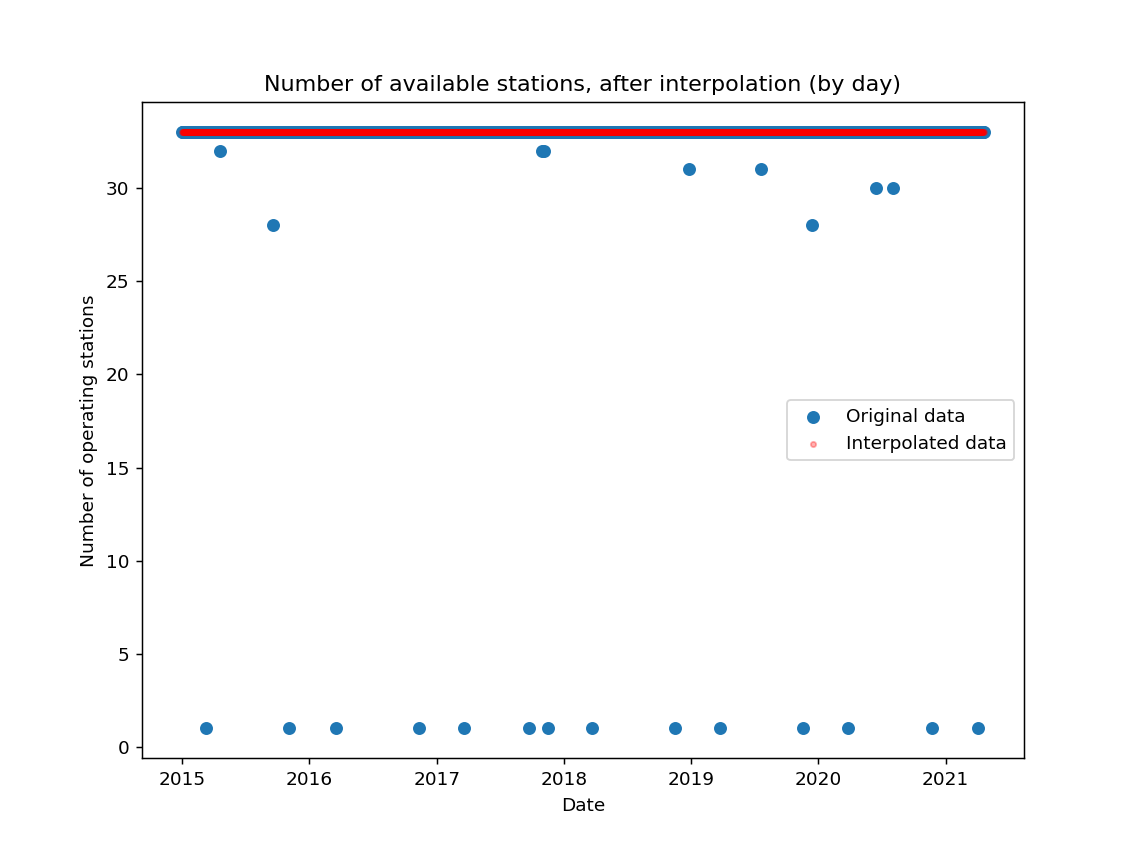

In [649]:
# This should no drastic dip...
# 2a) Seasonal-temperature
fig, ax = plt.subplots()
#ax.legend()

ax.scatter([dt for dt in df_full.datetime.unique()], avails_std, label='Original data') 
ax.set_title("Number of available stations (by day)")
ax.set_ylabel("Number of operating stations")
ax.scatter([dt for dt in df_full.datetime.unique()], avails_interp, color='r', s=8, alpha=0.3, label='Interpolated data') 
ax.set_title("Number of available stations, after interpolation (by day)")
ax.set_xlabel("Date")
ax.legend()
#ax[1].set_ylabel("Number of stations with interpolation")

<IPython.core.display.Javascript object>


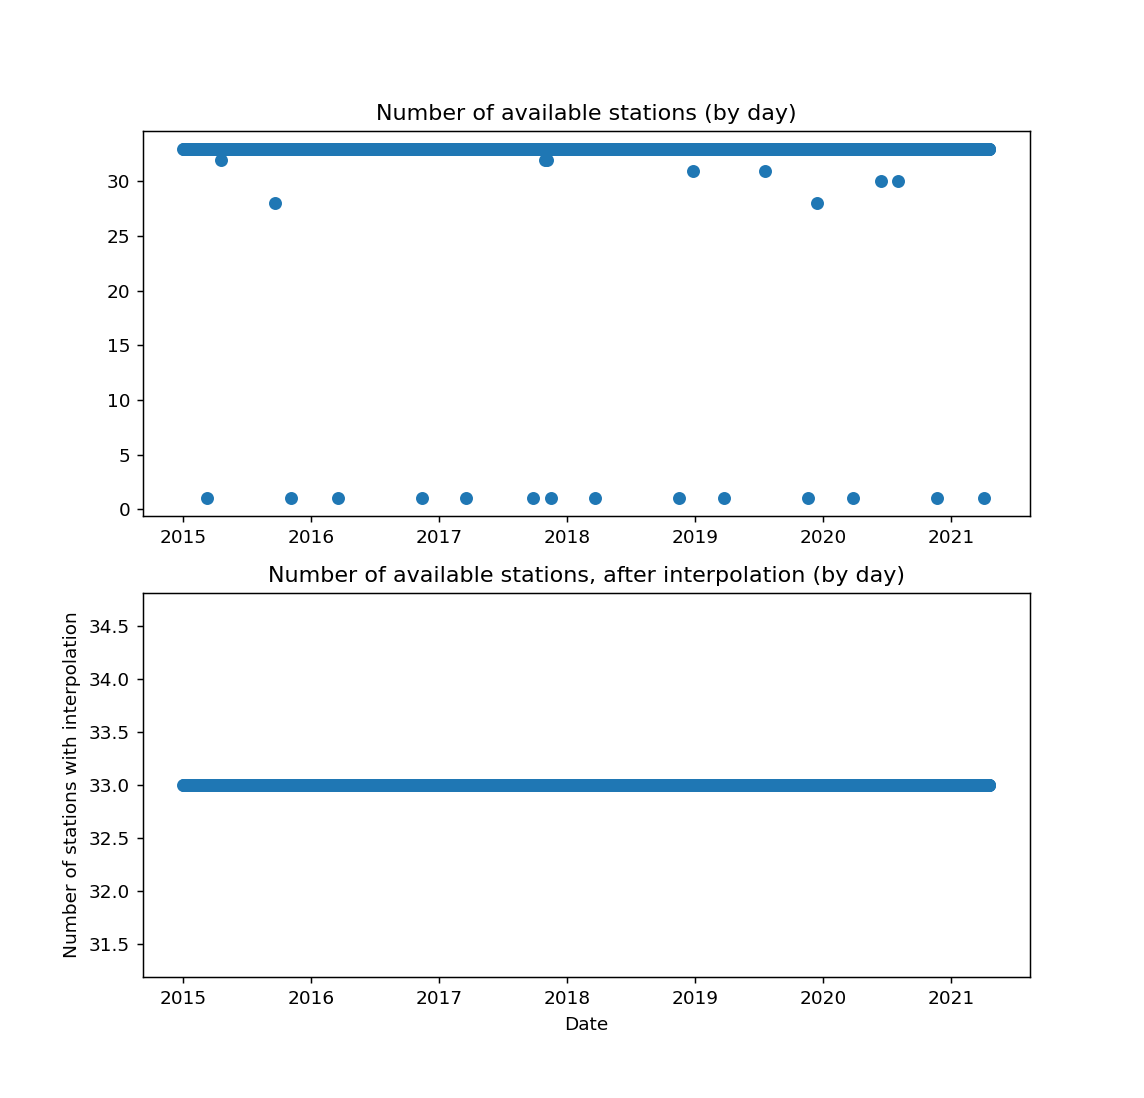

Text(0, 0.5, 'Number of stations with interpolation')

In [544]:
# This should no drastic dip...
# 2a) Seasonal-temperature
fig, ax = plt.subplots(2,1)
#ax.legend()

ax[0].scatter([dt for dt in df_full.datetime.unique()], avails_std) 
ax[0].set_title("Number of available stations (by day)")
ax[1].set_ylabel("Number of operating stations")
ax[1].scatter([dt for dt in df_full.datetime.unique()], avails_interp) 
ax[1].set_title("Number of available stations, after interpolation (by day)")

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of stations with interpolation")

In [551]:
df_full.sort_values(by=['datetime'])

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
89762,89218,Phoenix/Sky HRBR,UnitedStates,USA,North America,KPHX,1/1/2015,4.354167,1.7,7.2,Phoenix,Arizona,2015-01-01,"(-112.088, 33.5722)",33.5722,-112.0880
89728,89184,Boise,UnitedStates,USA,North America,KBOI,1/1/2015,-11.070833,-13.9,-8.0,Boise,Idaho,2015-01-01,"(-116.2311, 43.5985)",43.5985,-116.2311
89729,89185,Boston,UnitedStates,USA,North America,KBOS,1/1/2015,-2.329167,-5.6,0.6,Boston,Massachusetts,2015-01-01,"(-71.0202, 42.332)",42.3320,-71.0202
89746,89202,Little Rock,UnitedStates,USA,North America,KLIT,1/1/2015,2.362500,1.7,3.9,Little Rock,Arkansas,2015-01-01,"(-92.3586, 34.7254)",34.7254,-92.3586
89745,89201,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,1/1/2015,0.691667,-2.2,3.3,New York,New York,2015-01-01,"(-73.9385, 40.6643)",40.6643,-73.9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22,Memphis,UnitedStates,USA,North America,KMEM,4/20/2021,14.225000,4.4,23.3,Memphis,Tennessee,2021-04-20,"(-89.9785, 35.1035)",35.1035,-89.9785
565,21,Little Rock,UnitedStates,USA,North America,KLIT,4/20/2021,13.225000,5.6,23.3,Little Rock,Arkansas,2021-04-20,"(-92.3586, 34.7254)",34.7254,-92.3586
564,20,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,4/20/2021,16.891667,11.7,23.3,New York,New York,2021-04-20,"(-73.9385, 40.6643)",40.6643,-73.9385
562,18,Houston,UnitedStates,USA,North America,KIAH,4/20/2021,19.787500,11.7,27.2,Houston,Texas,2021-04-20,"(-95.3863, 29.7805)",29.7805,-95.3863


In [546]:
#build_interpolated_df('Raleigh/Durham') #'Atlanta'

In [547]:
df_temperature

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
0,0,Atlanta,UnitedStates,USA,North America,KATL,4/20/2021,17.491667,12.2,23.3,Atlanta,Georgia,2021-04-20,"(-84.4227, 33.7629)",33.7629,-84.4227
1,1,Windsor Locks,UnitedStates,USA,North America,KBDL,4/20/2021,13.887500,3.9,22.2,NaN,NaN,2021-04-20,"(nan, nan)",NaN,NaN
2,2,Nashville,UnitedStates,USA,North America,KBNA,4/20/2021,15.175000,6.7,23.3,Nashville,Tennessee,2021-04-20,"(-86.785, 36.1718)",36.1718,-86.7850
3,3,Boise,UnitedStates,USA,North America,KBOI,4/20/2021,9.329167,1.7,15.6,Boise,Idaho,2021-04-20,"(-116.2311, 43.5985)",43.5985,-116.2311
4,4,Boston,UnitedStates,USA,North America,KBOS,4/20/2021,16.716667,10.0,23.9,Boston,Massachusetts,2021-04-20,"(-71.0202, 42.332)",42.3320,-71.0202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89214,89214,Sacramento/Execu,UnitedStates,USA,North America,KSAC,1/1/2015,3.500000,-1.7,10.6,Sacramento,California,2015-01-01,"(-121.4686, 38.5666)",38.5666,-121.4686
89215,89215,Portland,UnitedStates,USA,North America,KPWM,1/1/2015,-3.454167,-7.8,-0.6,Portland,Oregon,2015-01-01,"(-122.65, 45.537)",45.5370,-122.6500
89216,89216,Raleigh/Durham,UnitedStates,USA,North America,KRDU,1/1/2015,3.291667,-4.4,10.6,Raleigh,North Carolina,2015-01-01,"(-78.6414, 35.8302)",35.8302,-78.6414
89217,89217,Pittsburgh,UnitedStates,USA,North America,KPIT,1/1/2015,-2.570833,-6.7,1.7,Pittsburgh,Pennsylvania,2015-01-01,"(-79.9766, 40.4398)",40.4398,-79.9766


In [584]:
def count_days_operational(df_temperature):
    """Count the frequency of (number of days operational)."""
    nums, freqs = np.unique(df_temperature['name'].value_counts(), return_counts=True)
    num_freqs = [(n, f) for n,f in zip(nums,freqs)]
    num_freqs = sorted(num_freqs, key=lambda x: x[0])
    return nums, freqs

In [586]:
count_days_operational(df_temperature)

(array([2286, 2287, 2288, 2302, 4575]), array([ 6, 14, 16,  1,  1]))

In [587]:
count_days_operational(df_full)

(array([2302, 4589]), array([37,  1]))

In [246]:
c

0

In [588]:
# Export dataframe and good to go
df_full.to_csv('data/interpolated_temperatures.csv')

In [ ]:
# Create daily version

In [589]:
def temperature_all_time(df):
    # 2a) Seasonal-temperature
    fig, ax = plt.subplots(2,1, sharex=True)
    ax[0].plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
    ax[0].plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
    ax[0].plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
    ax[0].set_ylabel("Temperature (C)")

    #ax.legend()
    ax[1].scatter([dt.date() for dt in datetimes], avail_stations) 
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel("Number of operating stations")


In [615]:
#temperature_all_time(df_temperature)

In [ ]:
## 

In [601]:
def haversine(origin, destination):
    # Lat/Long
    # Returns distance in km
    lat1, lon1 = origin
    lat2, lon2 = destination
    if np.isnan(lat2) or np.isnan(lon2):
        return float("nan")
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def closest_stations(latlong, date, df):
    """Stations and their distances, ranked descending."""
    # Unique
    
    df_of_day = df[df['datetime']  == datetime.datetime.strptime(date, "%m/%d/%Y")]
    names = df_of_day['name'].values
    #df_of_day = df_of_day['Lat']
    station_dists = {}
    for i,latlong_station in enumerate(df_of_day[['Lat', 'Lon']].values):
        if not (np.isnan(latlong_station[0]) or np.isnan(latlong_station[1])):
            station_dists[names[i]] = haversine(latlong, latlong_station)
        
    return station_dists


def idw_temperature_avg_min_max(origin, df_subset):
    # Interpolate avg temperature using inverse-distance-weighting,
    # using the stations data from df_subset

    latlongs = df_subset[['Lat','Lon']].values
    mean_temps = df_subset['temp_mean_c'].values
    min_temps = df_subset['temp_min_c'].values
    max_temps = df_subset['temp_max_c'].values


    # Compute distances
    dists = [haversine(origin, latlong) for latlong in latlongs]
    # Compute inverse-distance-weighted temperature, from stations in df_subset
    idw_means = [(t)*((1/(d+1))**2) for t,d in zip(mean_temps, dists)]
    idw_maxs = [(t)*((1/(d+1))**2) for t,d in zip(max_temps, dists)]
    idw_mins = [(t)*((1/(d+1))**2) for t,d in zip(min_temps, dists)]

    sqdist_sum = sum([((1/(d+1))**2) for d in dists])
    interpolated_mean = sum(idw_means)/sqdist_sum
    interpolated_min = sum(idw_mins)/sqdist_sum
    interpolated_max = sum(idw_maxs)/sqdist_sum

    return (interpolated_mean, interpolated_min, interpolated_max)

In [605]:
def make_list_of_dicts_of_temps(df_population, df_temperature):
    # For each unique date, each city. 
    # Compute temperature (using 3 neighbors, idw)
    # And save a tuple (t_mean, t_min, t_max)
    list_of_dicttemps = []
    for date in df_temperature.location_date.unique():
        dicttemp = {}
        dicttemp['date'] = date
        # And each unique city
        for i in range(len(df_population)):
            series = df_population.iloc[i]
            loc = (series.Lat, series.Lon)

            close_stations = closest_stations(loc, date, df_temperature)
            close_stations = sorted(close_stations.items(), key=lambda x: x[1])

            # Use only 3 closest stations, on the date
            mask = (df_temperature.name.isin([s[0] for s in close_stations[:3]])) & (df_temperature.location_date == date) 

            mean_temp, min_temp, max_temp = idw_temperature_avg_min_max(loc, df_temperature[mask])
            if (np.isnan(mean_temp)):
                print(df_temperature[mask])
            dicttemp[f"{series.City}, {series.State}"] = (mean_temp, min_temp, max_temp)
        # Append the dictionary of many city: (mean, min, max)
        list_of_dicttemps.append(dicttemp)
    return list_of_dicttemps

In [606]:
list_of_dicttemps_a = make_list_of_dicts_of_temps(df_population, df_temperature)

In [611]:
# Poss final, but doesn't use interpolated temps...
df_temps_by_city = pd.DataFrame(list_of_dicttemps_a)

In [612]:
df_temps_by_city.to_csv('data/df_temps_by_city_no_interp.csv')

In [608]:
len(list_of_dicttemps_a)

2302

In [614]:
df_temps_by_city.head()

,date,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York","Rochester, New York",...,"Pembroke Pines, Florida","Miramar, Florida","Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida"
0,4/20/2021,"(23.841999333317656, 18.22065166353723, 29.296...","(16.70421660981298, 10.04342742147525, 23.8668...","(16.849759514924095, 11.53728021387034, 23.332...","(16.855567800638827, 11.559447256086921, 23.32...","(16.823192681292728, 11.431308715762848, 23.35...","(16.879900325900227, 11.654082603430721, 23.30...","(10.761745462978059, 3.7233767016650443, 16.48...","(4.904217687078608, 0.6000406490398067, 8.9000...","(5.996897110028933, 1.339353090837338, 10.4527...",...,"(18.036603960902184, 11.87028367484808, 24.211...","(18.039894359884645, 11.874915815108348, 24.21...","(18.044589999389522, 11.879922826621932, 24.21...","(18.00158193751767, 11.812520485215058, 24.195...","(18.029212352470907, 11.853241798502026, 24.21...","(18.039439963941437, 11.866584501502512, 24.21...","(18.01061093466003, 11.820354330942722, 24.203...","(17.997437085482584, 11.799063128879384, 24.19...","(17.98563697357755, 11.780145526604061, 24.190...","(17.93317338726809, 11.699500105460082, 24.162..."
1,4/19/2021,"(22.52542599981928, 13.330009580556977, 30.578...","(12.655466501146307, 9.004133556629927, 16.788...","(14.65176100318946, 11.497063830128722, 18.227...","(14.664551128719106, 11.525280340605146, 18.23...","(14.590312408435787, 11.369069168967128, 18.18...","(14.719272297376737, 11.643074749691895, 18.27...","(12.27361695185151, 6.090906659978782, 17.8967...","(10.587509673435006, 4.400007690322795, 15.600...","(10.778162842914767, 4.527563154375227, 15.830...",...,"(16.12386338125959, 11.720220424448062, 21.054...","(16.126825210426954, 11.724219644664068, 21.05...","(16.130290618498684, 11.729865270885591, 21.05...","(16.088321458660737, 11.677329144092832, 21.03...","(16.114058829772002, 11.710981750996947, 21.04...","(16.12276397266435, 11.723372086726837, 21.049...","(16.09413312408938, 11.688115955152986, 21.036...","(16.080971183110687, 11.671998788007997, 21.03...","(16.069254578735013, 11.65756816932527, 21.025...","(16.018806464179672, 11.593542215916102, 21.00..."
2,4/18/2021,"(19.938493705313956, 14.384556150340913, 25.09...","(10.658796511837219, 6.379936522181989, 16.183...","(12.787496750036555, 9.367832757077343, 16.760...","(12.78373749695279, 9.370737331326652, 16.7527...","(12.801191465891533, 9.336096505943976, 16.802...","(12.769342498608177, 9.390041054072237, 16.717...","(14.120245003008238, 7.226678401614023, 20.058...","(8.520844281270183, 4.399956996757451, 12.2000...","(8.755866878374642, 4.364464613619003, 12.7404...",...,"(16.828301624010727, 12.464150234993513, 21.68...","(16.829710268249006, 12.468053558233116, 21.68...","(16.831536578576753, 12.473795944258875, 21.68...","(16.812337965641778, 12.423512274225825, 21.69...","(16.824375976085932, 12.45609386501133, 21.687...","(16.828633417758496, 12.468339902669914, 21.68...","(16.815643903007018, 12.434746504275752, 21.69...","(16.809689151619335, 12.41941328181536, 21.699...","(16.804372944672892, 12.405662509131515, 21.70...","(16.78113417116402, 12.344154656894286, 21.725..."
3,4/17/2021,"(18.32277659648683, 14.354191721756047, 22.200...","(6.29125217283941, 4.104409460251865, 9.687913...","(9.605320729735007, 6.111900561211705, 12.2850...","(9.59657789128626, 6.109507030408084, 12.27360...","(9.646254532523145, 6.114012009817377, 12.3416...","(9.55958644959893, 6.102897257338756, 12.22409...","(12.062699215339848, 6.625673408235676, 17.386...","(6.483349044422643, 4.399982814417088, 8.90006...","(6.723989793034049, 4.453030394857253, 9.32247...",...,"(16.151393577257736, 12.104719965139994, 19.98...","

In [ ]:
#

In [593]:
unique_dates

array(['4/20/2021', '4/19/2021', '4/18/2021', ..., '1/3/2015', '1/2/2015',
       '1/1/2015'], dtype=object)

In [221]:
df['num_operating'] = df['operating_stations'].apply(lambda x: len(x))